In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

# Standardize column names (remove spaces and special characters)
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('Score', 'Score')
df.columns = df.columns.str.replace('Type', 'Type')
df.columns = df.columns.str.replace('Earned', 'Earned')

In [7]:
# Drop irrelevant identifier columns for modeling
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Rename the cleaned columns for final use
df = df.rename(columns={
    'SatisfactionScore': 'Satisfaction_Score',
    'CardType': 'Card_Type',
    'PointEarned': 'Point_Earned'
})

print("--- Initial Data Snapshot ---")
print(df.head())
print("\n--- Data Information ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- Initial Data Snapshot ---
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction_Score Card_Type  Point_Earned  
0                   2   DIAMOND           464  
1                   

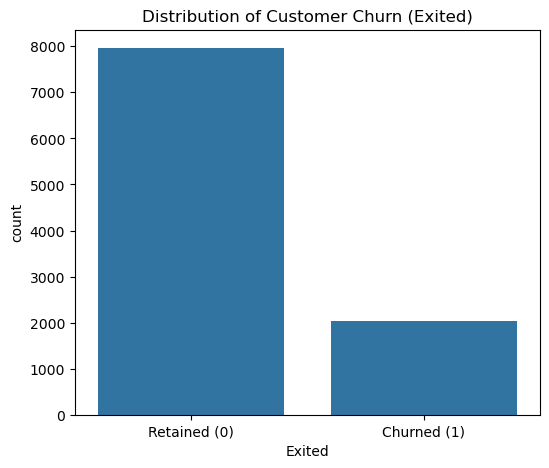


Overall Churn Rate: 20.38%


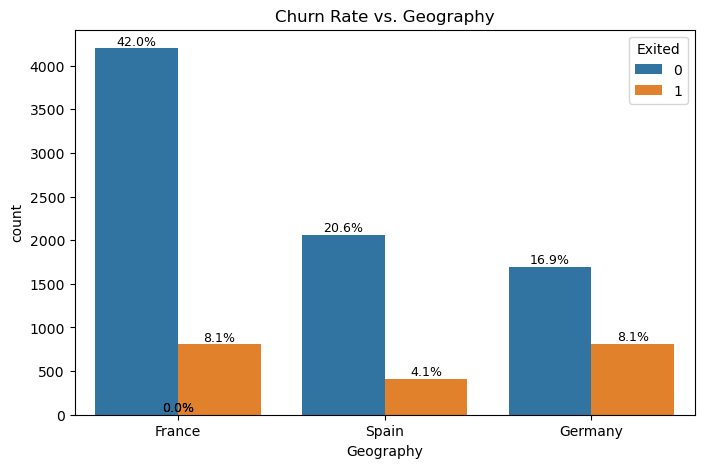

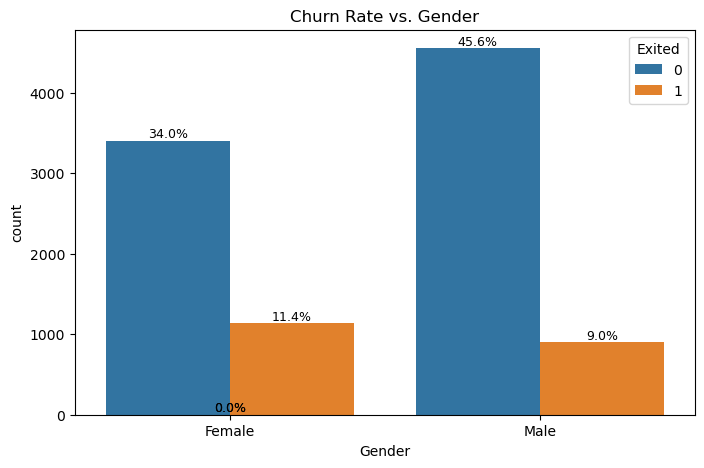

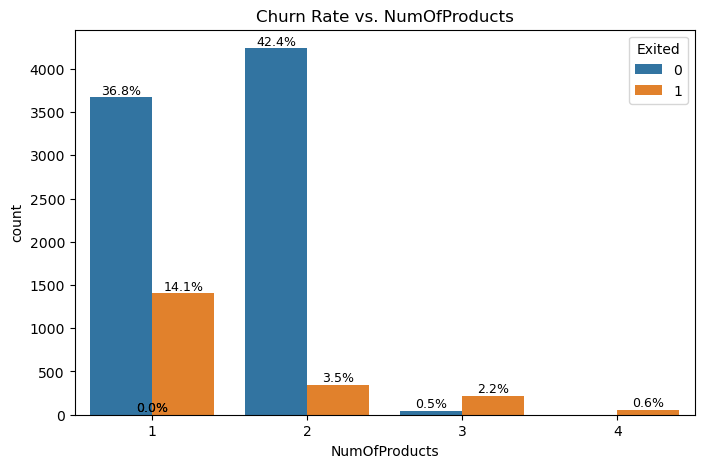

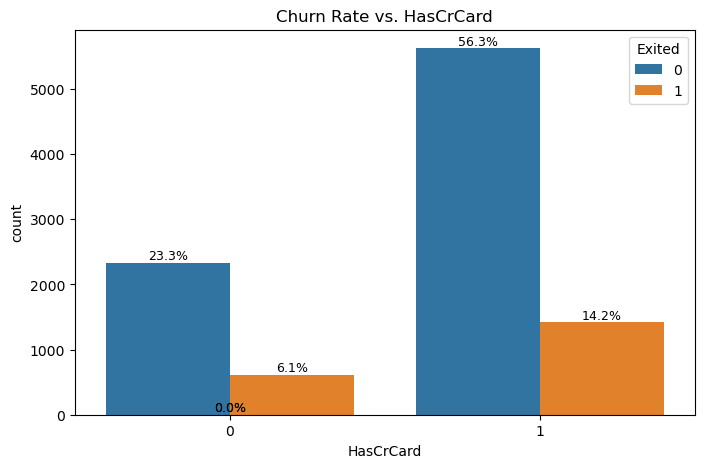

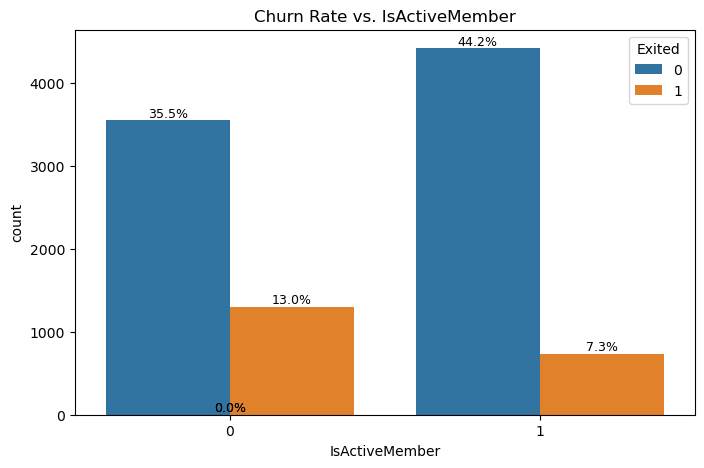

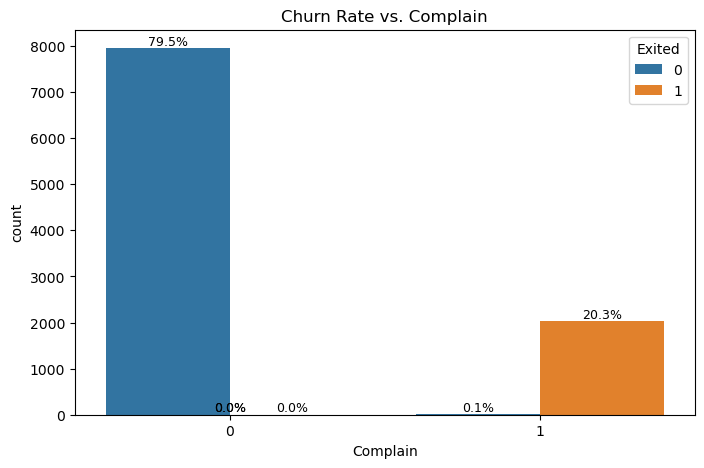

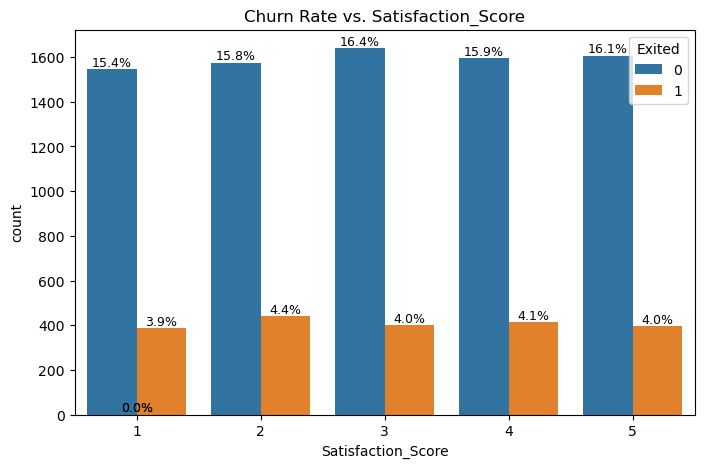

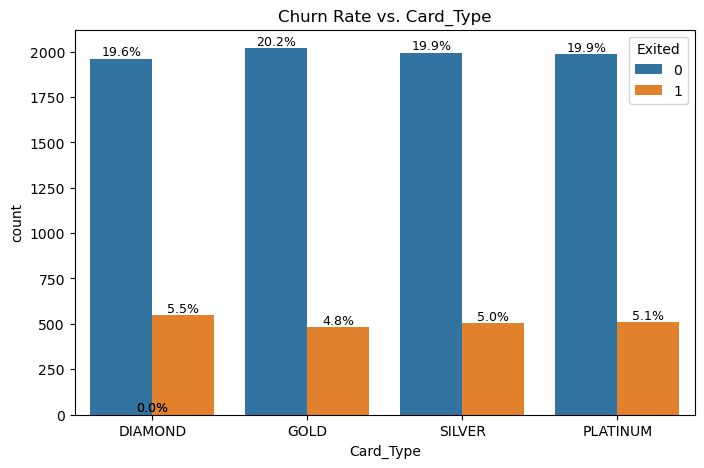

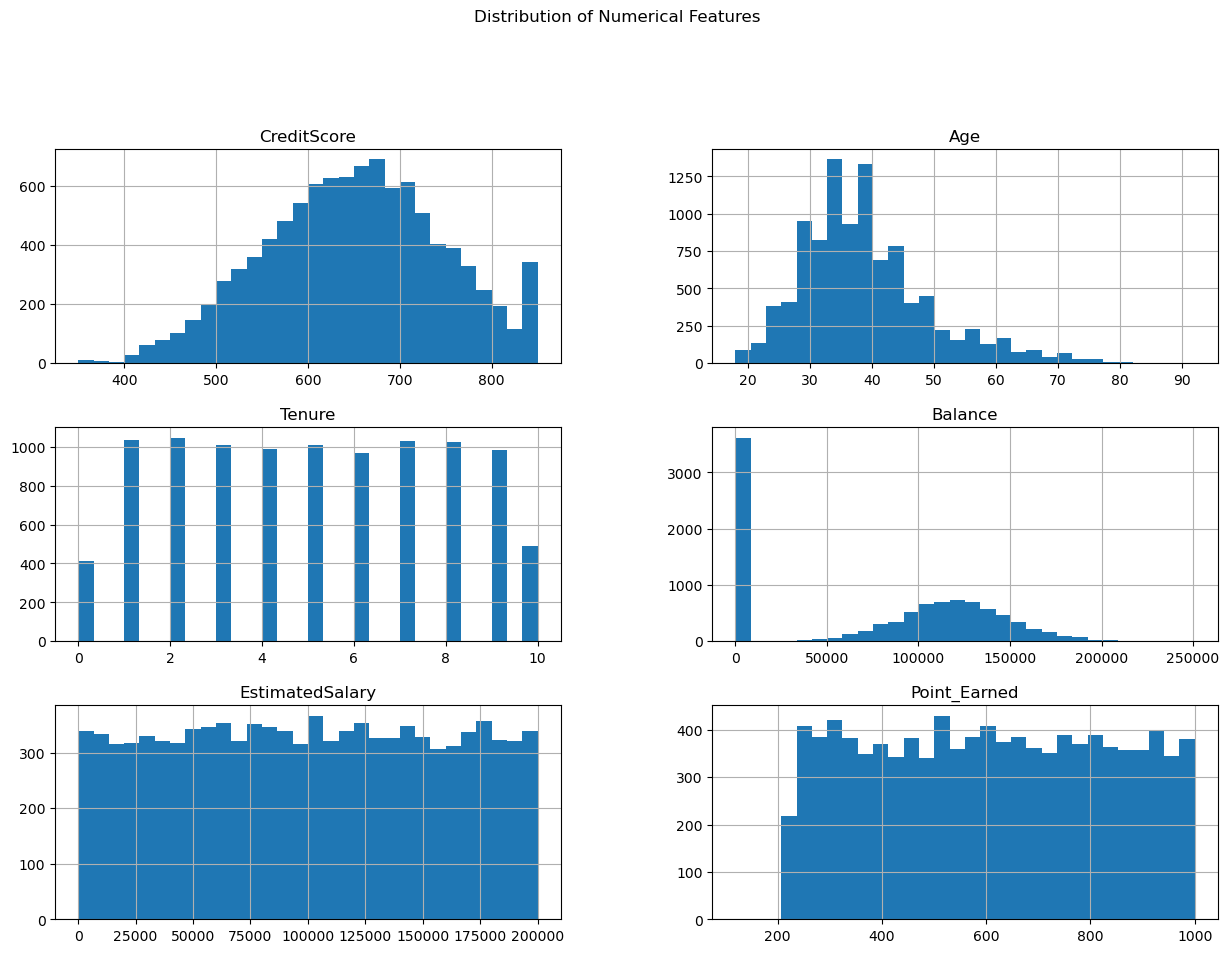

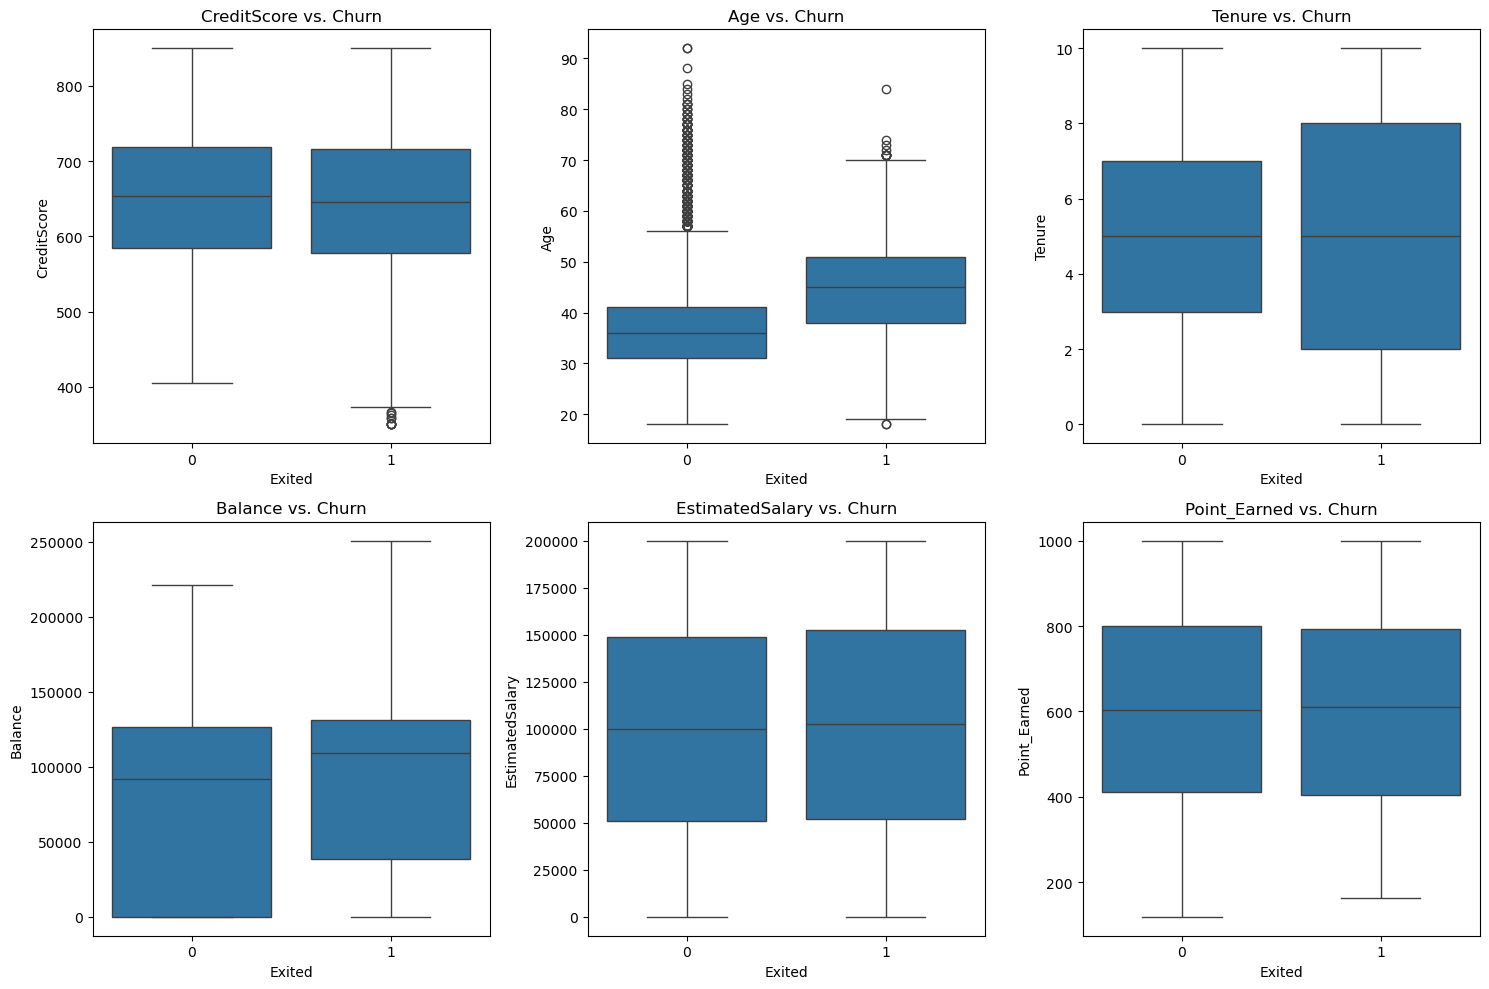

ValueError: could not convert string to float: 'France'

<Figure size 1200x1000 with 0 Axes>

In [11]:
# Target Variable Analysis (Exited)
plt.figure(figsize=(6, 5))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn (Exited)')
plt.xticks([0, 1], ['Retained (0)', 'Churned (1)'])
plt.show()

churn_rate = df['Exited'].mean()
print(f"\nOverall Churn Rate: {churn_rate:.2%}")

# --- Categorical Feature Analysis ---

categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction_Score', 'Card_Type']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    # Count plot to see distribution
    ax = sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Churn Rate vs. {col}')

    # Add annotations for churn rate in each category
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9)

    plt.show()

# --- Numerical Feature Analysis ---

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point_Earned']

# Distribution of numerical features
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

# Relationship between numerical features and Churn (Exited) - using Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs. Churn')
plt.tight_layout()
plt.show()

# Advanced Analysis: Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

# Key Insights from Correlation:
# - 'Age' has the highest positive correlation with 'Exited' (Churn).
# - 'IsActiveMember' and 'NumOfProducts' (negative correlation with Exited) are important.
# - 'Balance' also shows a moderate positive correlation with 'Exited'.

In [13]:
# One-hot encode categorical features (for future modeling step)
df_model_ready = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card_Type'], drop_first=True)

# Separate features (X) and target (y)
X = df_model_ready.drop('Exited', axis=1)
y = df_model_ready['Exited']

print("\n--- Final Data Structure for Modeling ---")
print(X.head())
print(X.shape)


--- Final Data Structure for Modeling ---
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Complain  Satisfaction_Score  \
0               1        101348.88         1                   2   
1               1        112542.58         1                   3   
2               0        113931.57         1                   3   
3               0         93826.63         0                   5   
4               1         79084.10         0                   5   

   Point_Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464              False            False        False   
1  